<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_DS_VC_Classificacao_de_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Análise e Classificação de Faces: visão Computacional com OpenCV</b></font>

<font color=gray size=2><a href="https://colab.research.google.com/drive/1GmuhJfaGYBLscfKt5arSnNWBJ4U63vgJ">Arquivo Colab</a></font>
<!--- Para indicar o arquivo a ser trabalhado a partir do Github, sem ter que criar uma nova cópias --->


<ul><font size=2 color=gray><b>FICHA TÉCNICA</b>
<li><a href="https://cursos.alura.com.br/course/analise-classificacao-faces-visao-computacional-opencv"><font size=2 color=gray>Análise e Classificação de Faces: visão Computacional com OpenCV</a>
<li>Carga Horária: 10 h
<li>Instrutora: Michel Fernandes
<li>Data de Início: 10-2022
</ul>


<hr color=gray><br>

* [Paper da Cascata de Haar](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf)

<!-- DESCRIÇÃO DOS TÓPICOS APRENDIDOS -->
<h3><b>Conteúdo / Aprendizagem:</b></h3>

- Seja capaz de extrair regiões de interesse de uma imagem.
- Normalize e pré-processe conjunto de dados de imagens.
- Construa classificadores para reconhecimento de faces.
- Valide a precisão do modelo construído para posterior aplicação em aplicações do mundo real.
- Extraia regiões do rosto humano baseado em marcos faciais.
- Crie aplicações que analise diferentes condições de cada componente do rosto humano.

* O que são regiões de interesse (do inglês ROI, Region Of Interest);
* Como as regiões de interesse ajudam a simplificar problemas de classificação de imagens;
* Manipular regiões de interesse para aplicar conversões de espaços de cores diferentes.
Como funcionam os classificadores em cascata de Haar.
Aplicar o classificador de faces frontais e como utilizá-los para extrair regiões de interesse de faces de uma imagem.
Como diferentes parâmetros de configuração, como número de vizinhos mínimos e escala de imagem podem influenciar na detecção de objetos com os classificadores em cascata de Haar.
A importância do pré-processamento de dados antes de treinar classificadores de aprendizado de máquina.
Técnicas de mover arquivos de pastas diferentes para dividi-las em treinamento e testes para posterior etapa de treinamento e validação.
Como redimensionar as imagens utilizando um interpolador que minimiza efeitos de artefatos em imagens que são ampliadas.

# <font color=orange>RESUMO</font>
<!-- DESCRIÇÃO DO PROCESSO DE PROCESAMENTO -->

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a><!-- Planilha de roteiros para Data Science -->

* <font color=orange><b>

* [Twitter Endpoints](https://docs.tweepy.org/en/stable/api.html#api-reference)

# <font color=orange>**CURSO**</font>
<!-- Descrição do projeto a ser realizado -->

**Projeto**: 


<!-- Material final oferecido no curso -->
<a href="https://github.com/alura-cursos/alura-analise-facial/tree/aula_6"><font size=2; color=gray>Material de referencial do curso</a></font>


## 0 - Ambiente

Podemos criar ambientes virtuais para que os projetos não sejam impactados pela quantidade de bibliotecas instaladas.

In [1]:
# !pip install opencv-python - já está instalado [atual: 4.6.0.66]

import cv2
import dlib
import seaborn as sns
import matplotlib.pyplot as plt

import urllib
from skimage import io
import numpy as np
from google.colab.patches import cv2_imshow

print('cv2:', cv2.__version__)
print('dlib:', dlib.__version__)
print('seaborn:', sns.__version__)

cv2: 4.6.0
dlib: 19.24.0
seaborn: 0.11.2


## 1 - Imagens

* O CV2 não consegue ler uma URL, mas somente arquivos binários.
* O método `io` do `skimage` consegue baixar a imagem da URL
* Também podemos fazer o download usando URLLIB ou Requests

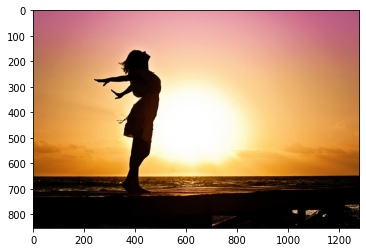

In [ ]:
 url_imagem = 'https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_1/imagens/px-girl.jpg'

if True:
    imagem = io.imread(url_imagem)
    plt.imshow(imagem)
else:
    # --- alternative ----
    req = urllib.request.urlopen(url_imagem)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    imagem = cv2.imdecode(arr, -1) 
    cv2_imshow(imagem)

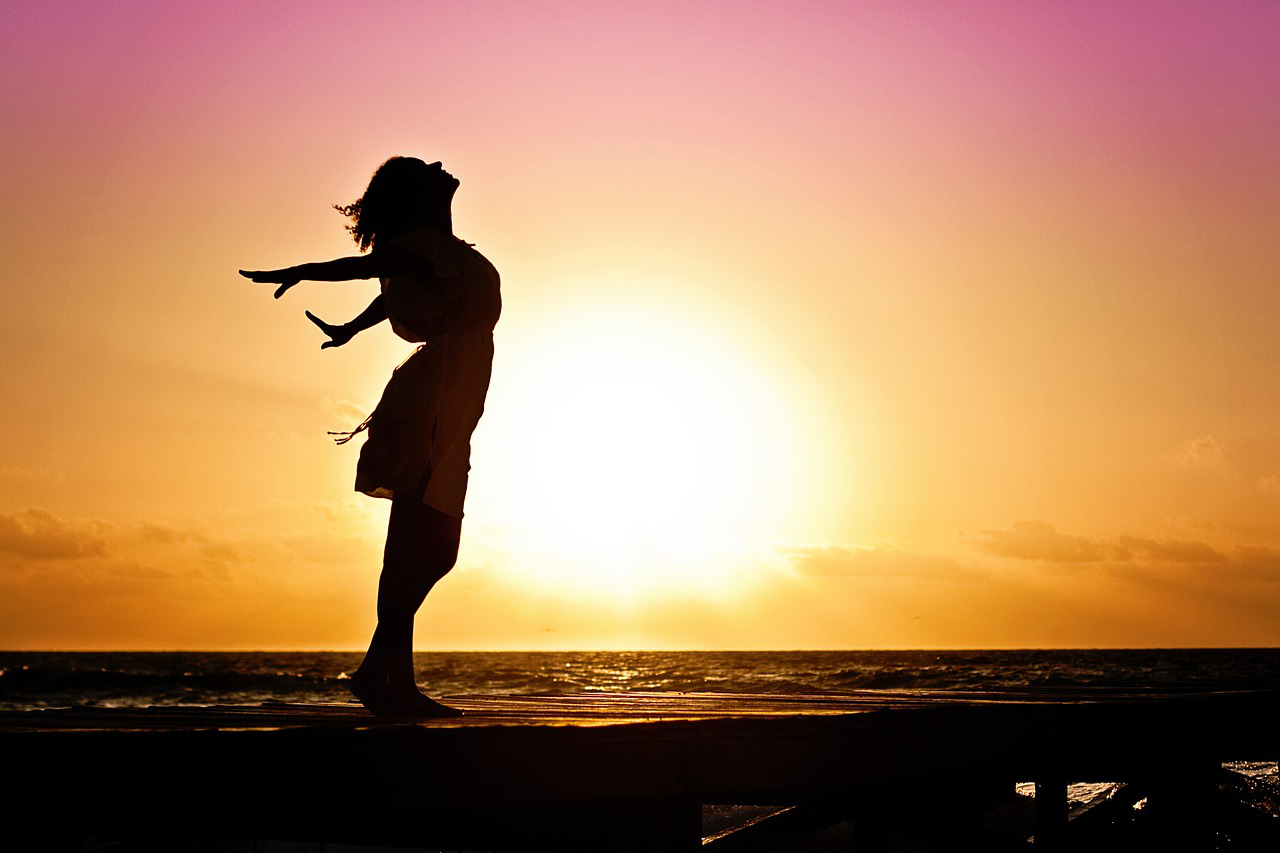

In [ ]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
cv2_imshow(imagem_rgb)

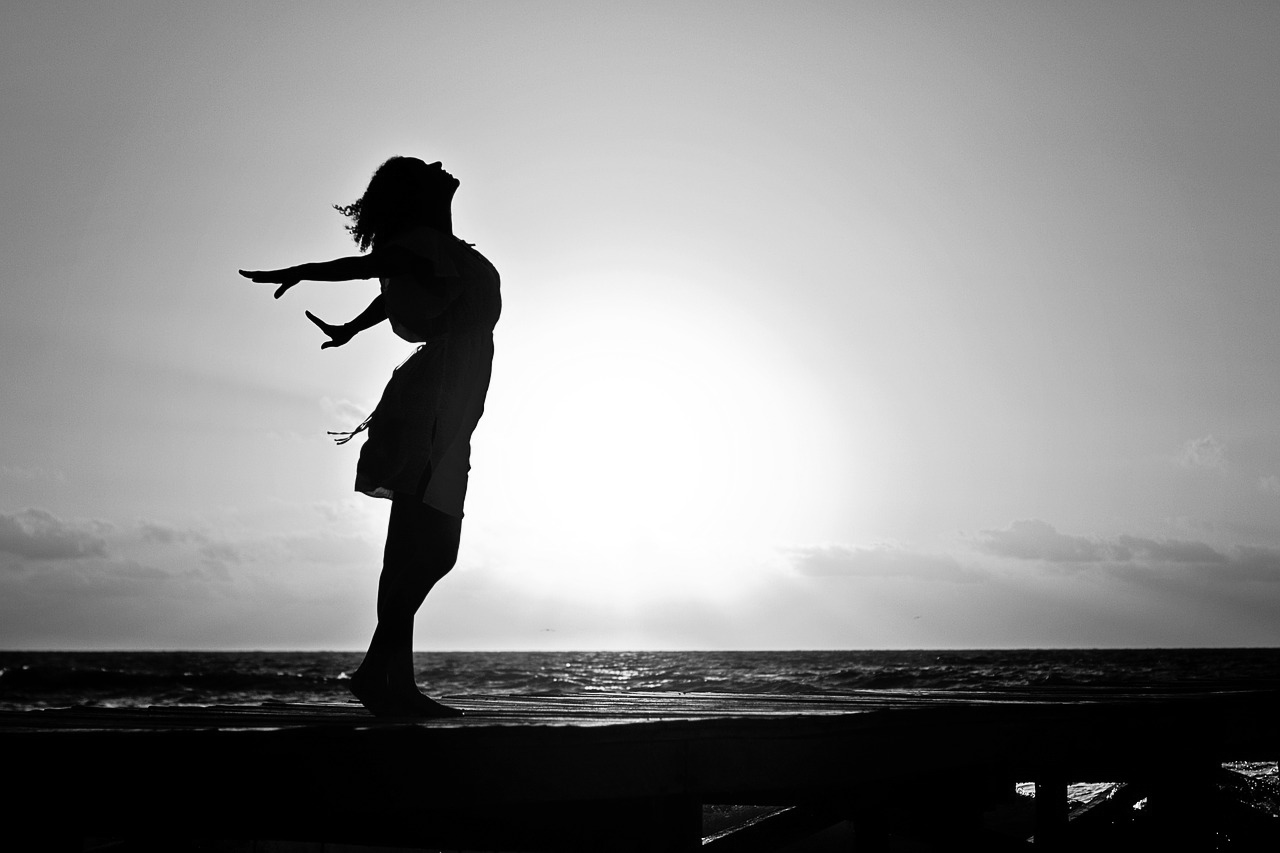

In [ ]:
# Conversão de cores
# imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
cv2_imshow(imagem_gray)

In [ ]:
# Complexidade da imagem
print('RGB:', imagem.shape)
print('GRAY:', imagem_gray.shape)

RGB: (853, 1280, 3)
GRAY: (853, 1280)


> A transformação para a escala é uma operação simples, pois somente soma e divide por 3 a intensidade de cada cor.

## 2 - Região de Interesse

É a área da imagem que possui os dados que interessa para o processamento, por exemplo, o rosto das pessoas em uma foto.

Para identificar a área de interesse (ROI) temos que ter cuidado com a simplicidade da imagem de interesse, para evitar a indicação de falso-positivos. Por exemplo, a identificação de vários sorrisos em uma imagem.

Nesses casos usamos uma téncica de classificação em cascata, em que primeiro é identificado um objeto maior, para depois identificar imagem dentro desta área de interesse. Isso simplifica a identificação dos objetos, ao mesmo tempo que melhora a acurácia da classifcação.

**Compreendendo o ROI**

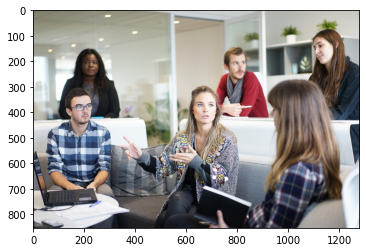

In [ ]:
url_imagem = 'https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_1/imagens/px-people.jpg'

imagem = io.imread(url_imagem)
plt.imshow(imagem)

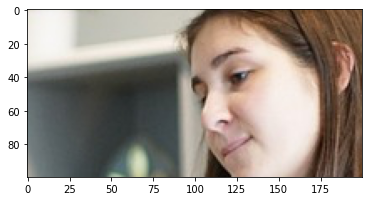

In [ ]:
imagem_roi = imagem[100:200, 1000:1200]
plt.imshow(imagem_roi)

In [ ]:
# Escrver imagem
imagem_roi_bgr = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
cv2.imwrite('imagem_roi.png', imagem_roi_bgr)

True

**PRATICANDO O ROI**

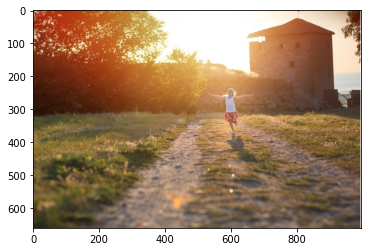

In [ ]:
# Carregando a imagem
url_imagem = 'https://caelum-online-public.s3.amazonaws.com/1364-visao-computacional-analise-facial/01/1364-img0102.png'

imagem = io.imread(url_imagem)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_RGBA2RGB)
plt.imshow(imagem_rgb)

In [ ]:
imagem_rgb.shape

(660, 995, 3)

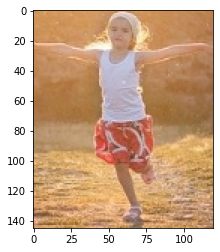

In [ ]:
# Seleção do corpo
imagem_roi = imagem_rgb[235:380, 540:660]
plt.imshow(imagem_roi)

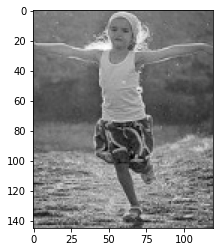

In [ ]:
imagem_roi_gray = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2GRAY)
plt.imshow(imagem_roi_gray, cmap="gray")

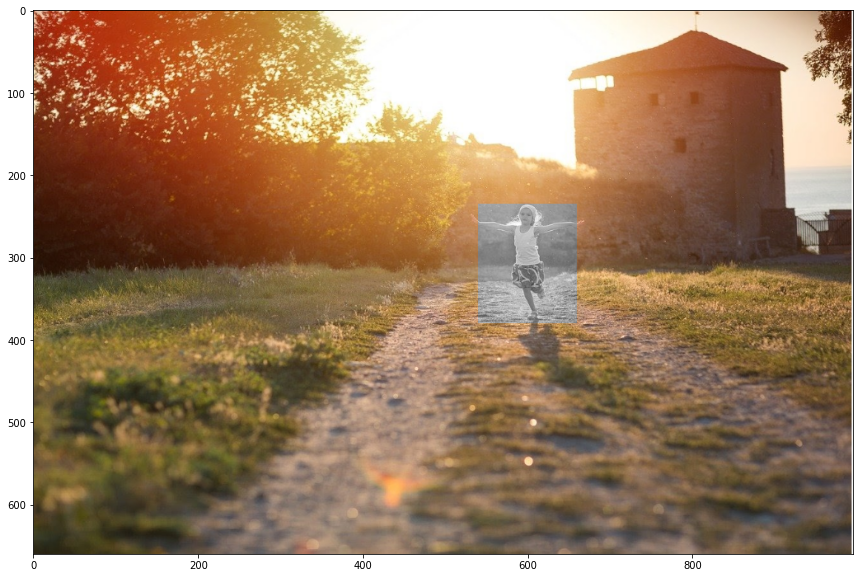

In [ ]:
roi_rgb = cv2.cvtColor(imagem_roi_gray, cv2.COLOR_GRAY2RGB)
imagem_comp = imagem_rgb
imagem_comp[235:380, 540:660] = roi_rgb

plt.figure(figsize=(20,10))
plt.imshow(imagem_comp)

## 3 - Classificação de Cascata de Haar

* O modelo precisa ser robusto o suficiente para identificar rostos em perspectiva
* Ele opera com um quadrado deslizante pela imagem, buscando identificar algumas características.
* As características buscadas são através dos filtros de comportamento das cores
* O `scaleFactor` irá diminuir este quadrado em cada ciclo;
* O conceito de `pareidolia` é um termo para segmentos que imagens que possuem as mesmas características procuradas (o mesmo padrão), engando o modelo e causando um falso-positivo (imagens negativas).

[Opções de modelos treinados](https://github.com/opencv/opencv/tree/master/data/haarcascades)

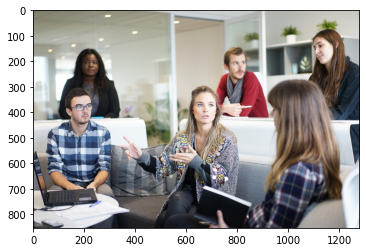

In [ ]:
url_imagem = 'https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_1/imagens/px-people.jpg'

imagem = io.imread(url_imagem)
plt.imshow(imagem)

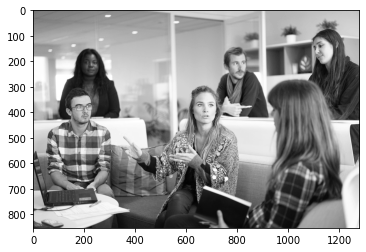

In [ ]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(imagem_gray, cmap='gray')

### Analisando uma face

In [ ]:
# Classificador para rostos frontais
root_path = '/usr/local/lib/python3.7/dist-packages/cv2/'

classificador = cv2.CascadeClassifier(root_path+'data/haarcascade_frontalface_default.xml')

In [ ]:
faces = classificador.detectMultiScale(imagem_gray, 
                                       scaleFactor=1.3,
                                       minNeighbors=5)

In [ ]:
len(faces)

5

In [ ]:
# Objeto de faces - xo, yo, width, height
faces[0]

array([189, 175,  75,  75], dtype=int32)

### Representação das faces identificadas

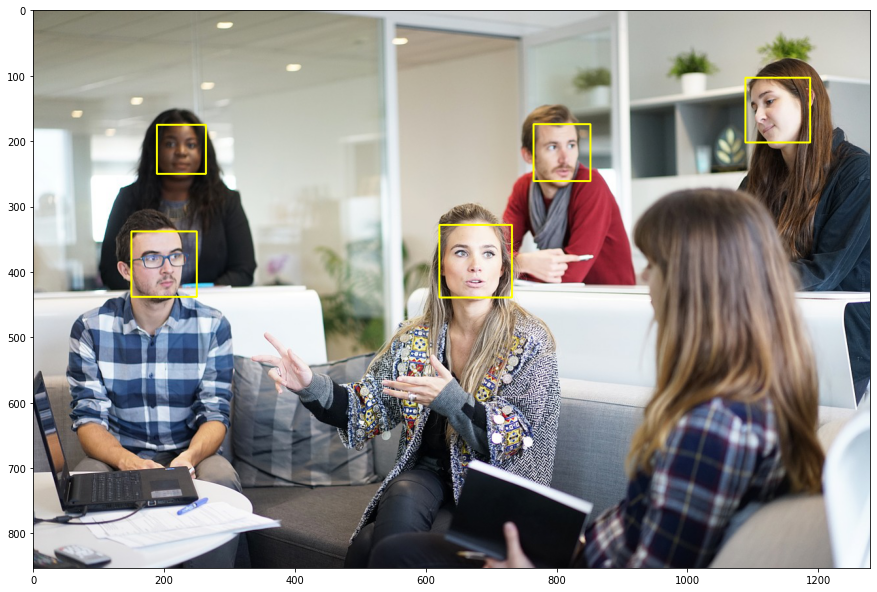

In [ ]:
# Desenhando retangulos
imagem_anotada = imagem.copy()

for (x, y, w, h) in faces:
    cv2.rectangle(imagem_anotada,
                  (x,y),
                  (x+w, y+h),
                  color=(255,255,0),
                  thickness=2)

plt.figure(figsize=(15,15))
plt.imshow(imagem_anotada)

### Salvando imagens das faces

In [ ]:
# Salvando imagens das faces
face_imagem = 0

for (x, y, w, h) in faces:
    face_imagem += 1
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite('face_' + str(face_imagem) + '.png', imagem_roi)

### Exercício de ROI

* Recorte somente da face

<h4> Case 1

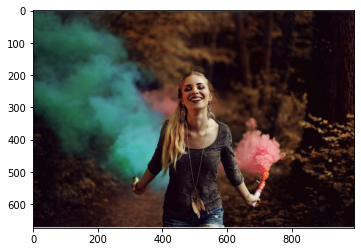

In [ ]:
# Case 1
url_img_1 = 'https://caelum-online-public.s3.amazonaws.com/1364-visao-computacional-analise-facial/02/1364-img0203.png'
img_1 = io.imread(url_img_1)
plt.imshow(img_1)

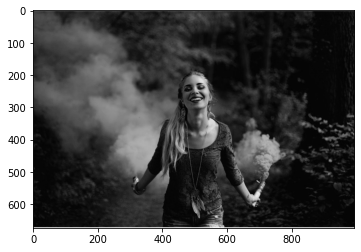

In [ ]:
# Desaturação da imagem
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
plt.imshow(img_1_gray, cmap='gray')

In [ ]:
# Classificador para rostos frontais
root_path = '/usr/local/lib/python3.7/dist-packages/cv2/'
classificador = cv2.CascadeClassifier(root_path+'data/haarcascade_frontalface_default.xml')

faces_1 = classificador.detectMultiScale(
    image=img_1_gray,
    scaleFactor=1.3, 
    minNeighbors=5
)
len(faces_1)

1

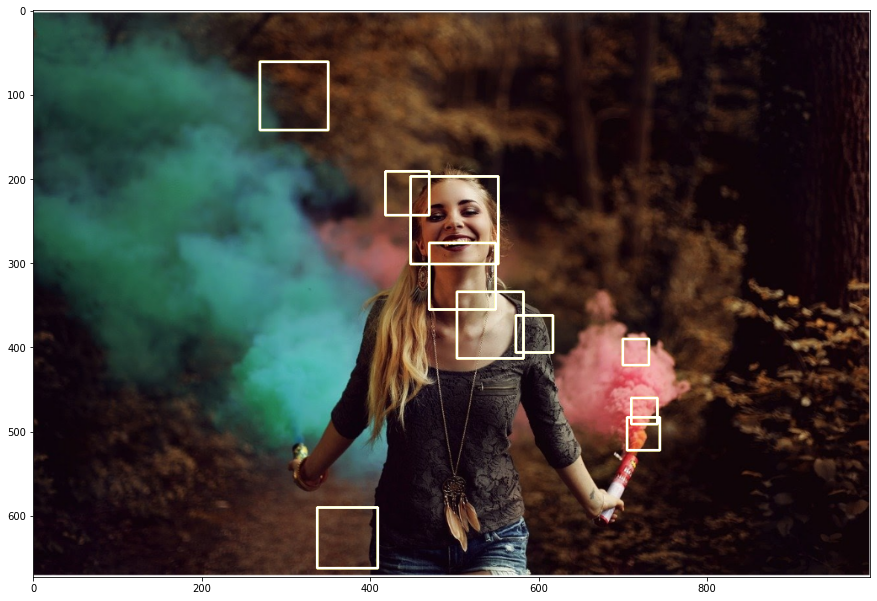

In [ ]:
# Visualização do quadro
img_anotada = img_1.copy()

for (x, y, w, h) in faces_1:
    cv2.rectangle(img_anotada,
                  (x,y),
                  (x+w, y+h),
                  color=(255,255,0),
                  thickness=2)

plt.figure(figsize=(15,15))
plt.imshow(img_anotada)

Quanto menor o `scaleFactor` maior será a probabilidade de ocorrência de **falso-positivos**. Como por exemplo na imagem acima, que foi encontrados 10 entidades, sendo que só há uma única face. Na demais, foi identificado o mesmo padrão, apesar de não se tratar de uma face. O melhor resultado foi obtido com escala = 1.3 ou 1.1, em que foi localizada a somente a face esperada.

<h4> Case 2

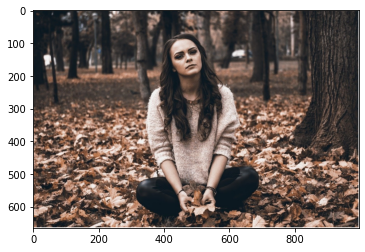

In [ ]:
# Case 2
url_img_2 = 'https://caelum-online-public.s3.amazonaws.com/1364-visao-computacional-analise-facial/02/1364-img0204.png'
img_2 = io.imread(url_img_2)
plt.imshow(img_2)

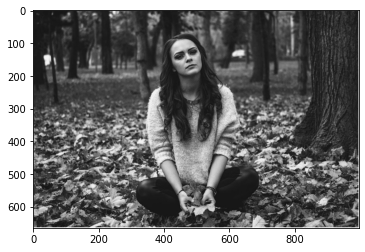

In [ ]:
# Desaturação da imagem
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
plt.imshow(img_2_gray, cmap='gray')

In [ ]:
# Classificador para rostos frontais
root_path = '/usr/local/lib/python3.7/dist-packages/cv2/'
classificador = cv2.CascadeClassifier(root_path+'data/haarcascade_frontalface_default.xml')

faces_2 = classificador.detectMultiScale(
    image=img_2_gray,
    scaleFactor=1.3, 
    minNeighbors=5
)
len(faces_2)

1

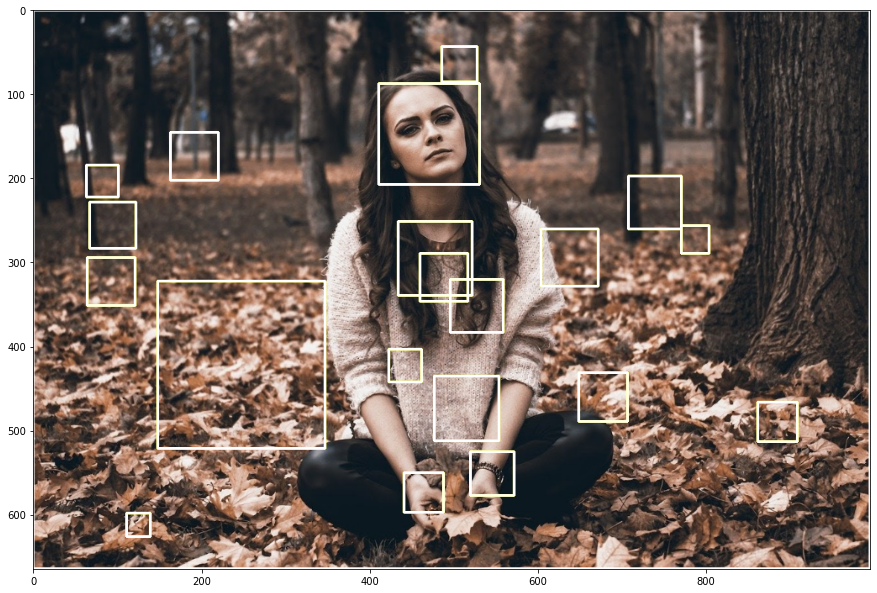

In [ ]:
# Visualização do quadro
img_anotada = img_2.copy()

for (x, y, w, h) in faces_2:
    cv2.rectangle(img_anotada,
                  (x,y),
                  (x+w, y+h),
                  color=(255,255,0),
                  thickness=2)

plt.figure(figsize=(15,15))
plt.imshow(img_anotada)

* `scaleFactor`
    * 1.01 → 20 faces
    * 1.1 → 2 faces
    * 1.2 → 1 face
    * 1.825 → 1 face

<h4> Case 3

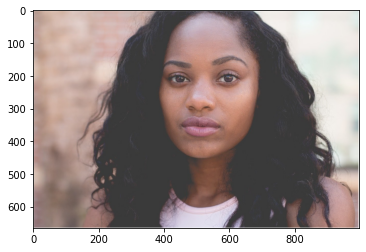

In [ ]:
# Case 3
url_img_3 = 'https://caelum-online-public.s3.amazonaws.com/1364-visao-computacional-analise-facial/02/1364-img0202.png'
img_3 = io.imread(url_img_3)
plt.imshow(img_3)

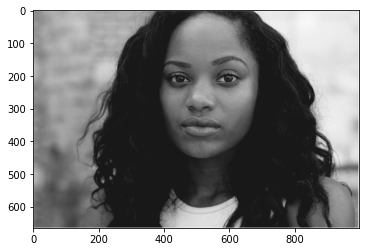

In [ ]:
# Desaturação da imagem
img_3_gray = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)
plt.imshow(img_3_gray, cmap='gray')

In [ ]:
# Classificador para rostos frontais
root_path = '/usr/local/lib/python3.7/dist-packages/cv2/'
classificador = cv2.CascadeClassifier(root_path+'data/haarcascade_frontalface_default.xml')

faces_3 = classificador.detectMultiScale(
    image=img_3_gray,
    scaleFactor=1.3, 
    minNeighbors=5
)
len(faces_3)

1

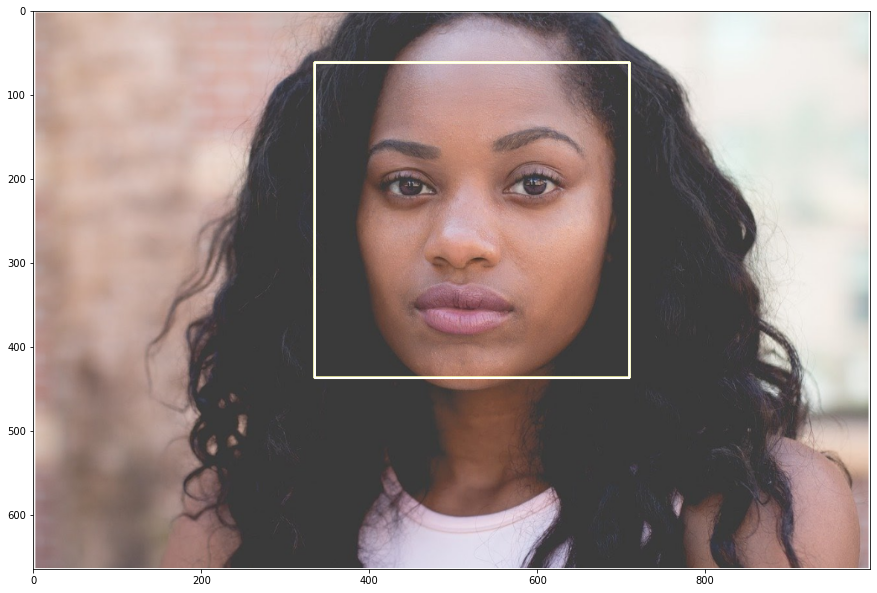

In [ ]:
# Visualização do quadro
img_anotada = img_3.copy()

for (x, y, w, h) in faces_3:
    cv2.rectangle(img_anotada,
                  (x,y),
                  (x+w, y+h),
                  color=(255,255,0),
                  thickness=2)

plt.figure(figsize=(15,15))
plt.imshow(img_anotada)

* `scaleFactor`
    * 1.01 → 4 faces
    * 1.1 → 2 faces
    * 1.2 → 1 face
    * 2.5 → 1 face
    * 3 → 0 face

<h4> ROI

In [ ]:
# ROI
for (x,y,w,h) in faces_1:
    roi_1 = img_1[y:y+h, x:x+w]

for (x,y,w,h) in faces_2:
    roi_2 = img_2[y:y+h, x:x+w]

for (x,y,w,h) in faces_3:
    roi_3 = img_3[y:y+h, x:x+w]

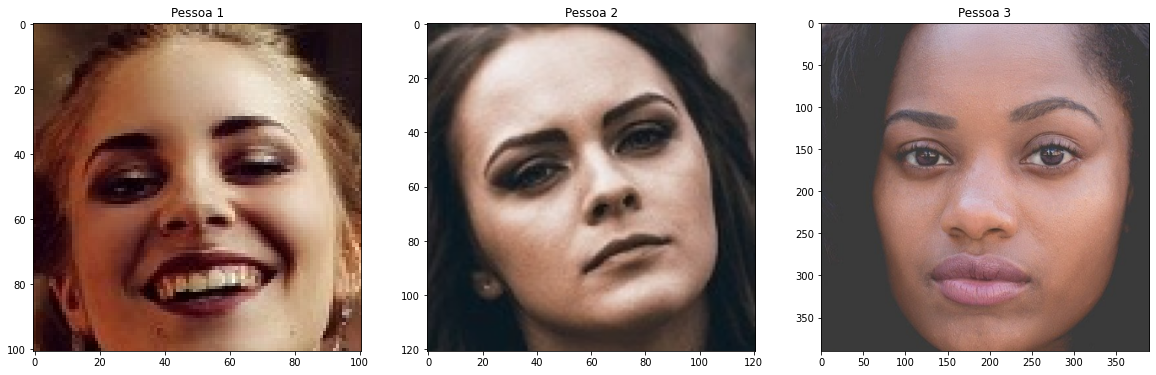

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title("Pessoa 1")
plt.imshow(roi_1)

plt.subplot(132)
plt.title("Pessoa 2")
plt.imshow(roi_2)

plt.subplot(133)
plt.title("Pessoa 3")
plt.imshow(roi_3)

plt.show()

## 4 - Classificação de Faces

A classificação de fases é a operação de identificar a quem cada face pertence. Para isso, será necessário termos exemplos de dados classificados, para que sirvam para o treinamento, o teste e a validação.

Neste exercícios usaremos os dados da Georgia Tech, que contém 15 imagens para cada pessoa.

### 4.1 - Pré-Processamento

Os rostos usados para o treinamento já foram segmentados, então não será preciso processar a Cascata de Haar para extrair as faces dos dados de treinamento, caso contrário, teríamos que realizar esta extração.

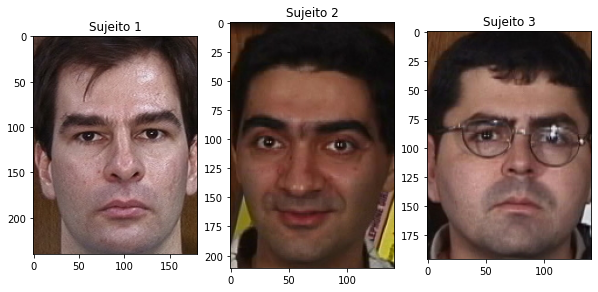

In [ ]:
# Exemplo dos dados
url_img_1 = 'https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_3/imagens/cropped_faces/s01_01.jpg'
imagem_face_1 = io.imread(url_img_1)
# plt.imshow(imagem_face_1)

url_img_2 = 'https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_3/imagens/cropped_faces/s02_01.jpg'
imagem_face_2 = io.imread(url_img_2)
# plt.imshow(imagem_face_2)

url_img_3 = 'https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_3/imagens/cropped_faces/s03_01.jpg'
imagem_face_3 = io.imread(url_img_3)
# plt.imshow(imagem_face_3)

plt.figure(figsize=(10,20))
plt.subplot(131)
plt.title('Sujeito 1')
plt.imshow(imagem_face_1)

plt.subplot(132)
plt.title('Sujeito 2')
plt.imshow(imagem_face_2)

plt.subplot(133)
plt.title('Sujeito 3')
plt.imshow(imagem_face_3)

**CONCLUSÕES**

* As imagens possuem dimensões diferentes, o que dificulta a identificação das mesmas regiões.
    * Como solução devemos realizar a NORMALIZAÇÃO.

In [ ]:
# Experimentação da geração dos nomes das imagens
[f's01_{n:02}' for n in range(1, 16)]

['s01_01',
 's01_02',
 's01_03',
 's01_04',
 's01_05',
 's01_06',
 's01_07',
 's01_08',
 's01_09',
 's01_10',
 's01_11',
 's01_12',
 's01_13',
 's01_14',
 's01_15']

In [ ]:
# # Separação para treino e teste - Geração dos 750 nomes das imagens
nomes_imagens_treino = [f's{sujeito:02}_{n:02}' for n in range(1, 11) for sujeito in range(1,51)]
nomes_imagens_teste = [f's{sujeito:02}_{n:02}' for n in range(11, 16) for sujeito in range(1,51)]

len(nomes_imagens_teste) + len(nomes_imagens_treino)

150

In [ ]:
# Padronização das imagens - grayscale e redimensionamento
def padronizar_imagem(imagem_caminho):
    imagem = io.imread(imagem_caminho)
    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

    tamanho_padrao = (200,200)
    imagem_resized = cv2.resize(imagem_gray, tamanho_padrao, interpolation=cv2.INTER_LANCZOS4)
    return imagem_resized

In [ ]:
%%time
# Construção das listas com os dados para o treinamento e para o teste
dados_tratados, sujeitos = [], []
dados_tratados_teste, sujeitos_teste = [], []
url_dados = 'https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_3/imagens/cropped_faces/'

for i, arq in enumerate(nomes_imagens_treino):
    imagem_path = url_dados + arq + '.jpg'
    imagem = padronizar_imagem(imagem_path)
    dados_tratados.append(imagem)
    sujeitos.append(int(arq[1:3]))

for i, arq in enumerate(nomes_imagens_teste):
    imagem_path = url_dados + arq + '.jpg'
    imagem = padronizar_imagem(imagem_path)
    dados_tratados_teste.append(imagem)
    sujeitos_teste.append(int(arq[1:3]))

CPU times: user 999 ms, sys: 146 ms, total: 1.14 s
Wall time: 20.3 s


> Com 20% dos dados, o processo levou: 20 segundos

In [ ]:
print(len(sujeitos), len(dados_tratados))
print(len(sujeitos_teste), len(dados_tratados_teste))

100 100
50 50


In [ ]:
dados_tratados[0].shape

(200, 200)

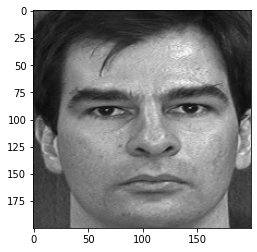

In [ ]:
plt.imshow(dados_tratados[0], cmap='gray')

#### Exercício de Pré-processamento

> Geralmente, o tamanho padrão é dado pelo classificador. Neste exemplo, vamos arbitrar um a partir da mediana das dimensões das 3 imagens, de altura e comprimento.

In [ ]:
# Medianas
median_height = np.median([roi_1.shape[0], roi_2.shape[0], roi_3.shape[0]])
median_width = np.median([roi_1.shape[1], roi_2.shape[1], roi_3.shape[1]])

In [ ]:
face_size = (162, 162)
rosto_1 = cv2.resize(roi_1, face_size, interpolation=cv2.INTER_LANCZOS4)
rosto_2 = cv2.resize(roi_2, face_size, interpolation=cv2.INTER_LANCZOS4)
rosto_3 = cv2.resize(roi_3, face_size, interpolation=cv2.INTER_LANCZOS4)

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title("Pessoa 1")
plt.imshow(rosto_1)

plt.subplot(132)
plt.title("Pessoa 2")
plt.imshow(rosto_2)

plt.subplot(133)
plt.title("Pessoa 3")
plt.imshow(rosto_3)

plt.show()

In [ ]:
rosto_1_bgr = cv2.cvtColor(rosto_1, cv2.COLOR_RGB2BGR)
rosto_2_bgr = cv2.cvtColor(rosto_2, cv2.COLOR_RGB2BGR)
rosto_3_bgr = cv2.cvtColor(rosto_3, cv2.COLOR_RGB2BGR)

cv2.imwrite("face_1.png", rosto_1_bgr)
cv2.imwrite("face_2.png", rosto_2_bgr)
cv2.imwrite("face_3.png", rosto_3_bgr)

### 4.2 Algoritmos de Classificação de Faces

#### Eigenfaces

* Requisito: lista de array de int 32 bits

<h3>Como funciona o Eigenfaces na classificação?</h3>

* Ele utiliza o PCA (principal components analysis) para realização de redução dimensional, buscando maximizar a **VARIÂNICA** intra classes.
* Ele é muito sensível a diferenças de iluminação.

1. O modelo obtém uma média da face da pessoa.
2. Com o PCA é definido o que seriam fatores de identificação da pessoa, podendo da componente principal uma característica, como a barba, o cabelo etc.
    - O problema disso é que pessoas com as mesma característica (barba etc) se tornam próximas.


**Análise de similaridade**: identico = 0, discrepante=$\infty$.

In [1]:
import numpy as np

In [ ]:
%%time
# Conversão para o formato de entrada exigida
sujeitos = np.array(sujeitos, dtype=np.int32)
sujeitos_teste = np.array(sujeitos_teste, dtype=np.int32)

# Instância
modelo_eigenfaces = cv2.face.EigenFaceRecognizer_create()

# Treinamento
modelo_eigenfaces.train(dados_tratados, sujeitos)

In [ ]:
# Exemplos de dados usados no treinamento
plt.figure(figsize=(20,10))

plt.subplot(121)
suj = 6
plt.title('Sujeito' + str(sujeitos_teste[suj]))
plt.imshow(dados_tratados[suj], cmpa='gray')

plt.subplot(122)
suj = 7
plt.title('Sujeito' + str(sujeitos_teste[suj]))
plt.imshow(dados_tratados[suj], cmpa='gray')

plt.show()

In [ ]:
# Predição - Sujeito 7
predicao = modelo_eigenfaces.predict(dados_tratados_teste[6])
predicao

* Verificação se trata do mesmo sujeito (pelo número)
* Valor da distância da predição

In [ ]:
# Predição - Sujeito 19
predicao = modelo_eigenfaces.predict(dados_tratados_teste[7])
predicao

#### FisherFaces

* Requisito: lista de array de int 32 bits

<h3>Como funciona o Fisherfaces na classificação?</h3>

* Ele consegue ser um pouco mais robusto do que outros algorítmos.
* Lida um pouco melhor com variação de iluminação, mas ainda é bem sensível.
* É um modelo bom para aprender sobre as expressões faciais.

- Usa o LDA (Linear Discriminant Analysis): maximiza a variância entre as classes.
- Ele busca maximizar as informações extra-classe (diferentes classes para classificar objetos distintos), e não os componentes ou informações dentro da própria classe.

In [ ]:
# Instância
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()
modelo_fisherfaces.train(dados_tratados, sujeitos)  # sujeitos em int32

# Predição - Sujeito 7
predicao = modelo_fisherfaces.predict(dados_tratados_teste[6])
predicao

In [ ]:
# Exemplos de dados usados no treinamento
plt.figure(figsize=(20,10))

plt.subplot(121)
suj = 13
plt.title('Sujeito' + str(sujeitos_teste[suj]))
plt.imshow(dados_tratados[suj], cmpa='gray')

plt.subplot(122)
suj = 19
plt.title('Sujeito' + str(sujeitos_teste[suj]))
plt.imshow(dados_tratados[suj], cmpa='gray')

plt.show()

In [ ]:
# Predição - Sujeito 5
predicao = modelo_fisherfaces.predict(dados_tratados_teste[13])
predicao

In [ ]:
# Predição - Sujeito 42
predicao = modelo_fisherfaces.predict(dados_tratados_teste[19])
predicao

#### LBPH

(Local Binary Pattern Histogram)

* Requisito: lista de array de int 32 bits

<h3>Como funciona o LBPH na classificação?</h3>

* É considerado um dos modelos mais robustos;
* Possui diversos filtros para eliminar o impacto da iluminação e até mesmo ruídos.

PROCESSO
- Ele analisa recortes de 3x3 pixels, comparando o valor central com o valor dos pixels adjacentes.
- Tendo isso, ele constroi um número binário.
- Juntando os inúmeros resultados é construído um histograma,
- Depois é comparado com outro histograma, buscando identificar a diferença por distância euclidiana.

Por construir o vetor através da comparação entre o pixel central e os seus adjacentes, ele consegue criar um filtro relativo, melhorando o desempenho em situações de iluminação diferentes.

> A operação de **limiarização de intensidade** atenua muito os efeitos de ruídos, como o de iluminação inadequada.

In [ ]:
# Instância
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()
modelo_lbph.train(dados_tratados, sujeitos)  # sujeitos em int32

In [ ]:
# Exemplos de dados usados no treinamento
plt.figure(figsize=(20,10))

plt.subplot(121)
suj = 21
plt.title('Sujeito' + str(sujeitos_teste[suj]))
plt.imshow(dados_tratados[suj], cmpa='gray')

plt.subplot(122)
suj = 27
plt.title('Sujeito' + str(sujeitos_teste[suj]))
plt.imshow(dados_tratados[suj], cmpa='gray')

plt.show()

In [ ]:
# Predição
predicao = modelo_lbph.predict(dados_tratados_teste[21])
predicao

In [ ]:
# Predição
predicao = modelo_lbph.predict(dados_tratados_teste[27])
predicao

### Avaliação dos Modelos

A avaliação dos modelos é realizada através da acurácia, mas também também pode ser feita com o precisão e recall, dependendo do problema do negócio e qual tipo de erro é oferece maior risco ao negócio.

Na avaliação é interessante considerar o por quê cada modelo não se desempenhou tão bem. Quais os fatores na base de dados que levaram atais resultados.

**Estudo benchmarking**: é testar diversos modelos, mesmo que não seja esperado um bom resultado.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_eigenfaces = []
for item in dados_tratados_teste:
    sujeito = modelo_eigenfaces.predict(item)[0]
    y_pred_eigenfaces.append(sujeito)
acuracia_eigenfaces = accuracy_score(sujeitos_teste, y_pred_eigenfaces)

y_pred_fisherfaces = []
for item in dados_tratados_teste:
    sujeito = modelo_fisherfaces.predict(item)[0]
    y_pred_fisherfaces.append(sujeito)
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)

y_pred_lbph = []
for item in dados_tratados_teste:
    sujeito = modelo_lbph.predict(item)[0]
    y_pred_lbph.append(sujeito)
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)

In [ ]:
print('Acurácia do modelo eigenfaces:', y_pred_eigenfaces)
print('Acurácia do modelo fisherfaces:', y_pred_fisherfaces)
print('Acurácia do modelo lbph:', y_pred_lbph)